# Blood Glucose Control - EDA

**Name:** Yimeng Xie



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [67]:
import pandas as pd
import os

patient_dfs = []
for file in os.listdir("../data"):
    if(file.endswith(".csv")):
        patient_df = pd.read_csv(f"../data/{file}")
        patient_df['pwd_id'] = file.split(".")[0]
        patient_dfs.append(patient_df)
        
df = pd.concat(patient_dfs)

### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

For my first visualization I made a radial plot of hourly average blood glucose levels for each PWD. I thought it would be helpful for PWDs to have a radial plot instead of a regular line plot because it makes it easier to see patterns throughout the day. For instance, blood glucose tends to dip round midnight for both PWDs.

C:\Users\xieyi\AppData\Local\Temp\ipykernel_15152\2275549694.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Midnight', '3AM', '6AM', '9AM', 'Noon', '3PM', '6PM', '9PM'])


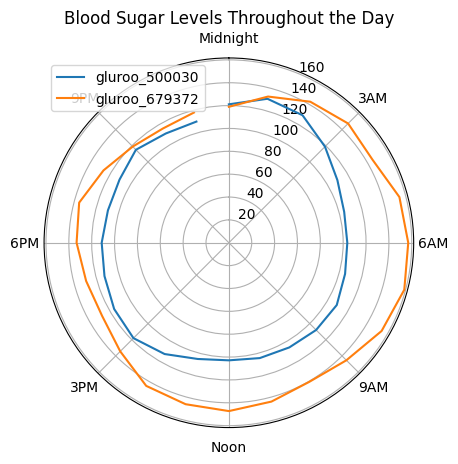

In [68]:
import matplotlib.pyplot as plt
import numpy as np

df["date"] = pd.to_datetime(df["date"], format="mixed", utc=True)
df["hour"] = df["date"].dt.hour

def polar_plot_bgl_day(df):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    for pwd_id, pwd_data in df.groupby("pwd_id"):
        hourly_mean_bgl = pwd_data.groupby("hour").bgl.agg("mean")
        angles = (hourly_mean_bgl.index / 24) * 2 * np.pi
        ax.plot(angles, hourly_mean_bgl, label=pwd_id)
    ax.set_title('Blood Sugar Levels Throughout the Day')
    ax.set_theta_zero_location('N')  # Start at midnight (top of the plot)
    ax.set_theta_direction(-1)  # Clockwise direction
    ax.set_xticklabels(['Midnight', '3AM', '6AM', '9AM', 'Noon', '3PM', '6PM', '9PM'])
    ax.legend(loc="best")

    plt.show()

polar_plot_bgl_day(df)

For my second visualization I made a heatmap of message types for each hour. This shows us typical times a PWD does certain activities, which should help PWDs keep track of their habits and see how they change over time.

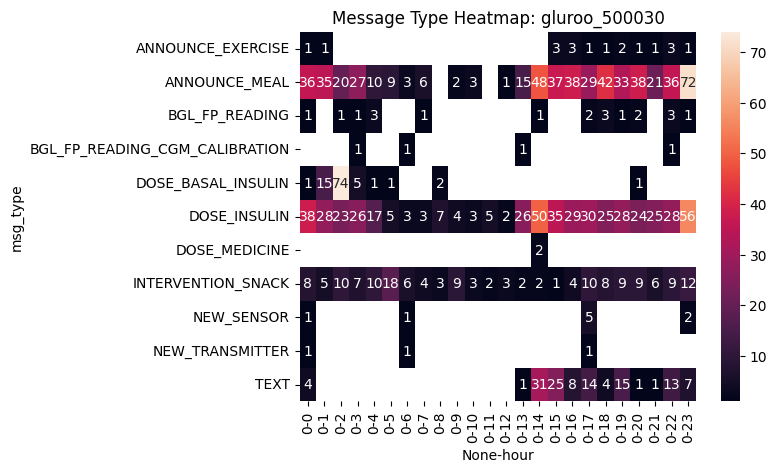

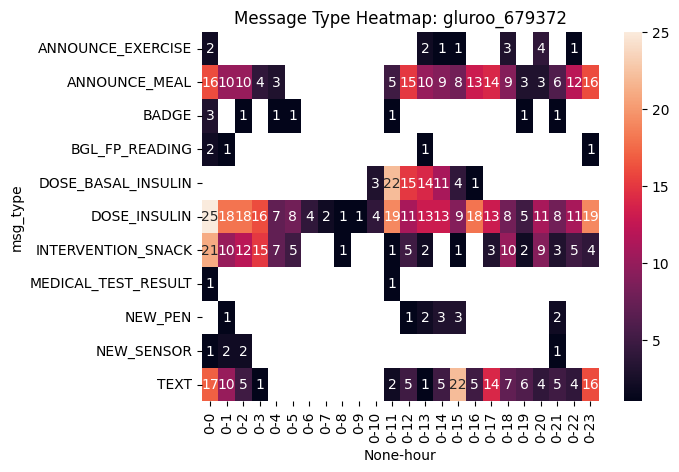

In [69]:
import seaborn as sns
def heatmap_msg_type(pwd_id, df):
    fig, ax = plt.subplots()
    hourly_events = df.groupby(["hour", "msg_type"]).size().reset_index().pivot(columns='hour',index='msg_type')
    sns.heatmap(hourly_events, annot=True)
    ax.set_title(f'Message Type Heatmap: {pwd_id}')

for pwd_id, pwd_data in df.groupby("pwd_id"):
    heatmap_msg_type(pwd_id, pwd_data)

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. Do most people with T1D use similar strategies for managing their diabetes, or are there a variety of ways to manage it? If so, are there reasons a health professional may recommend a PWD choose one method over another?
2. What are some long term health affects if T1D is not managed properly? Can these affects develop after only a short time or only after a long time of not managing T1D properly?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`